<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center"> diamonds price</h3>
    <h4 align="center"><a href="https://github.com/yasinpr7">yasin</a></h5>
</div>

**overview**:this data set its about price of diamond and 9 feature that i use them to prediction the diamonds prices.


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## **step one**: i import the dataset and read that with pandas library

In [66]:
diamonds=pd.read_csv('diamonds.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## **step two**: now im doing the **Exploratory Data Analysis (EDA)** for this data set.
maybe you ask me that what meaning of EDA. for answer this question read the below paragraph

**EDA**:Exploratory Data Analysis (EDA) is one of the techniques used for extracting vital features and trends used by machine learning and deep learning models in Data Science.

In [68]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [67]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- [x] now i find the three coloumns that have object value .i should convert the object value to int or float value because in ML we use the numerical value

## **step three:data preprocessing**

in this section i do the  below steps:


- [x] 1.Show dataset at first.
- [x] 2.Find missing value and Drop rows with missing values.
- [x] 3.Convert the data frame to NumPy.
- [x] 4.Divide the data set into training data and test data.

In [69]:
diamonds.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [70]:
diamonds.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

oh! that's great. i dont have any missing value in diamonds dataset

- now i want to convert three object value colomns to int value.three coloumns contain the cut ,color and clarity  respectively

In [71]:
diamonds.replace('Fair',0,inplace=True)
diamonds.replace('Good',1,inplace=True)
diamonds.replace('Very Good',2,inplace=True)
diamonds.replace('Premium',3,inplace=True)
diamonds.replace('Ideal',4,inplace=True)
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [72]:
diamonds.replace('D',0,inplace=True)
diamonds.replace('E',1,inplace=True)
diamonds.replace('F',2,inplace=True)
diamonds.replace('G',3,inplace=True)
diamonds.replace('H',4,inplace=True)
diamonds.replace('I',5,inplace=True)
diamonds.replace('J',6,inplace=True)
diamonds.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,6,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,5,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,4,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,4,VS1,59.4,61.0,338,4.00,4.05,2.39


In [73]:
diamonds.replace('I1',0,inplace=True)
diamonds.replace('SI2',1,inplace=True)
diamonds.replace('SI1',2,inplace=True)
diamonds.replace('VS2',3,inplace=True)
diamonds.replace('VS1',4,inplace=True)
diamonds.replace('VVS2',5,inplace=True)
diamonds.replace('VVS1',6,inplace=True)
diamonds.replace('IF',7,inplace=True)
diamonds.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,6,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,4,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,4,4,59.4,61.0,338,4.00,4.05,2.39


In [74]:
diamonds=diamonds.rename(columns={"x": "Length", "y": "width","z":"depth","depth":"total depth percentage"})
diamonds

,carat,cut,color,clarity,total depth percentage,table,price,Length,width,depth
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [75]:
x=diamonds[['carat','cut','color','clarity','total depth percentage' ,'table' ,'price','Length' ,'width' ,'depth']]
x

,carat,cut,color,clarity,total depth percentage,table,price,Length,width,depth
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [76]:
y=diamonds[['price']]
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


- [x] now time to train and test split

## step four:  Strorytelling - Visualization

Python offers several plotting libraries, namely Matplotlib, Seaborn and many other such data visualization packages with different features for creating informative, customized, and appealing plots to present data in the most simple and effective way.

Text(0.5, 1.0, 'Correlation Heatmap')

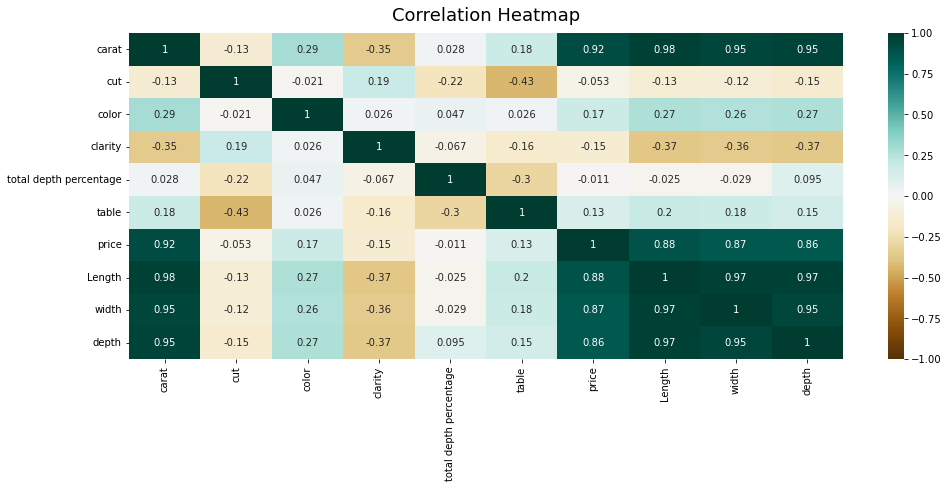

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(diamonds.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


- price coloumn have a maximum correlation with carat and then lenth, width and depth too. so i plot them

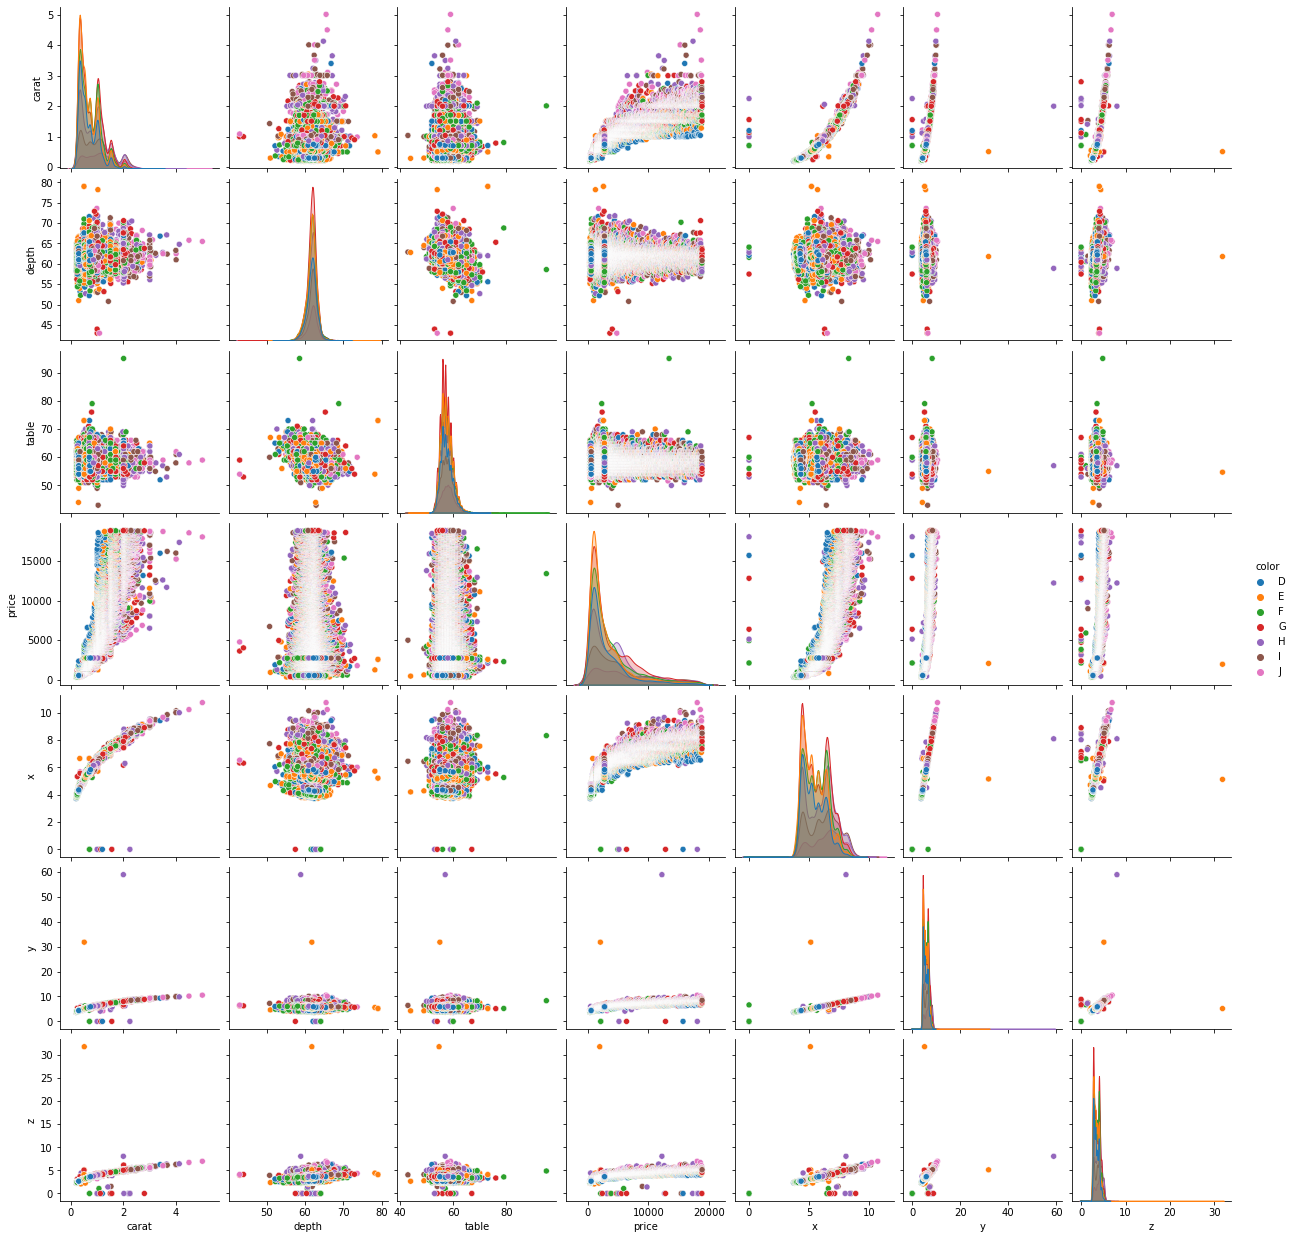

In [14]:
diamonds= sns.load_dataset("diamonds")
sns.pairplot(diamonds,hue='color')

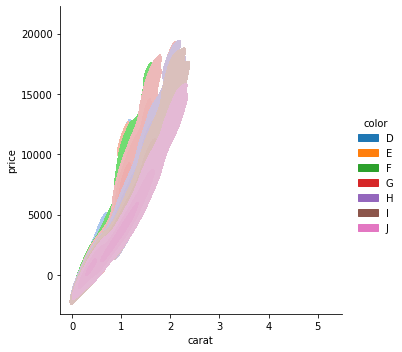

In [15]:
sns.displot(diamonds, x="carat",y='price', hue='color',kind="kde", fill="True")

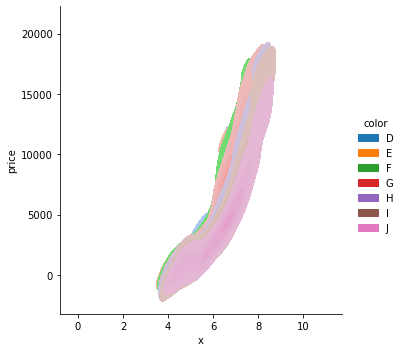

In [17]:
sns.displot(diamonds, x='x',y='price', hue='color',kind="kde", fill="True")

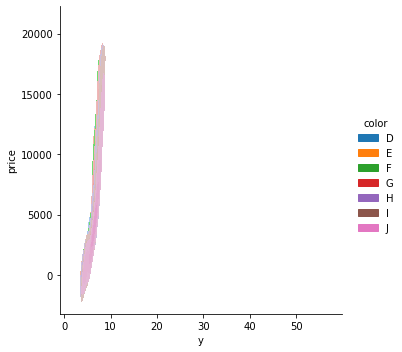

In [19]:
sns.displot(diamonds, x="y",y='price', hue='color',kind="kde", fill="True")

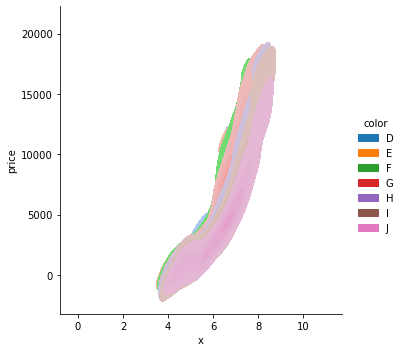

In [21]:
sns.displot(diamonds, x="x",y='price', hue='color',kind="kde", fill="True")

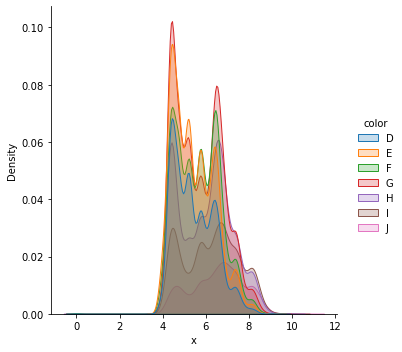

In [22]:
sns.displot(diamonds, x="x", hue='color',kind="kde", fill="True")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


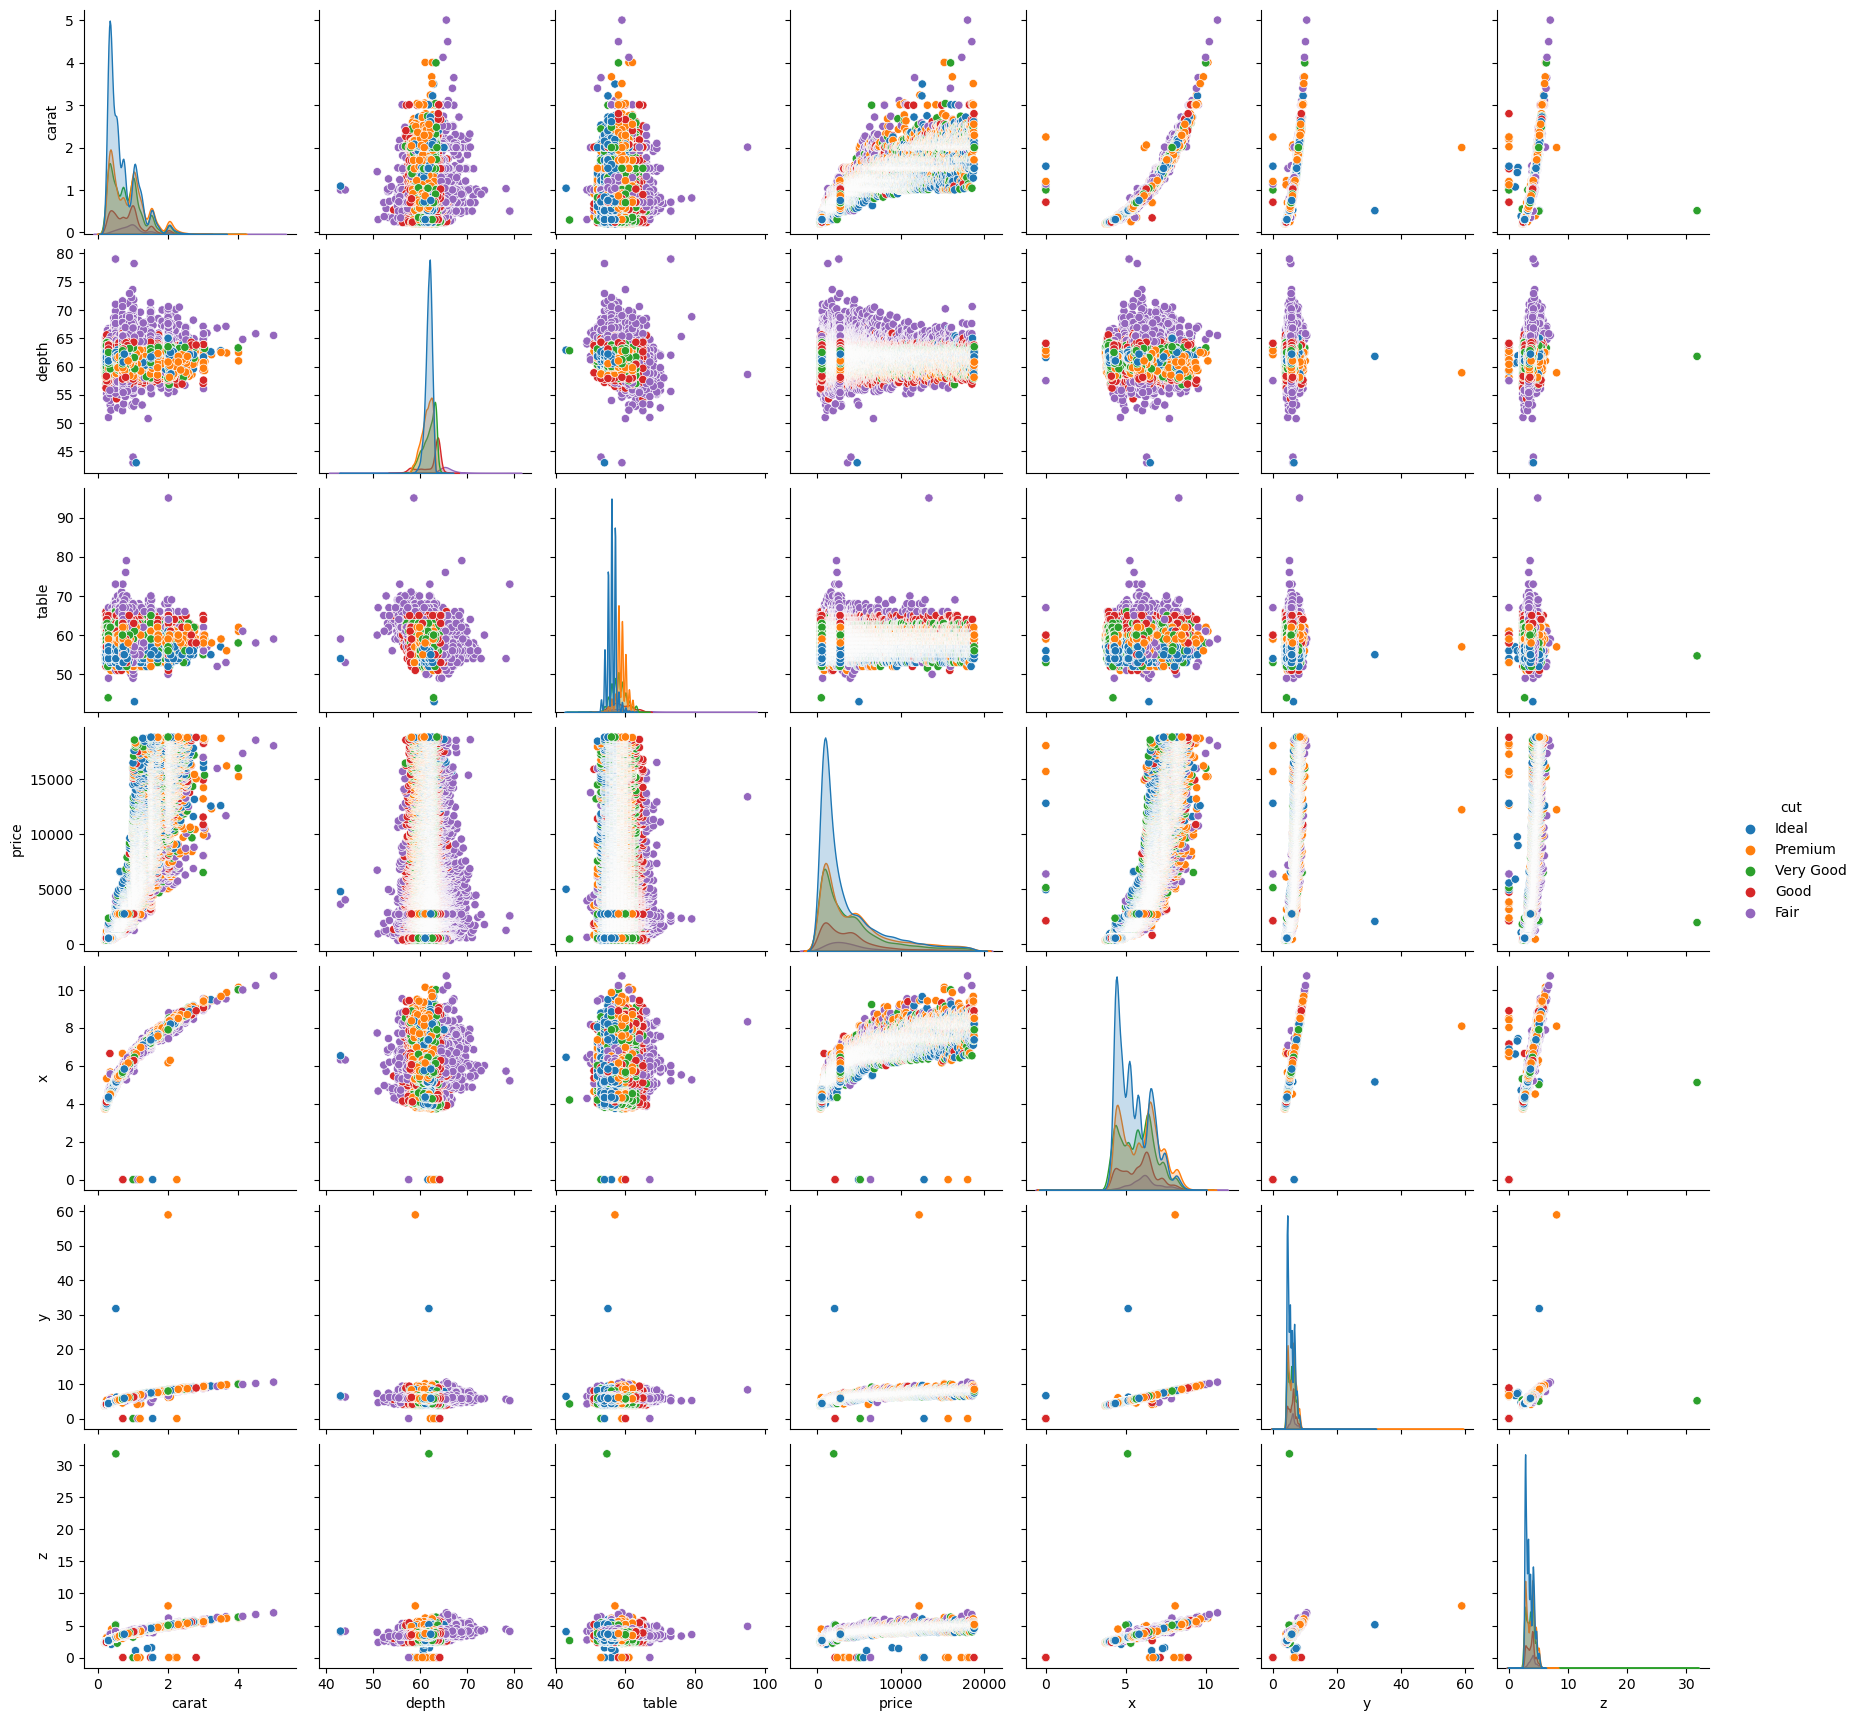

In [25]:
#diamonds= sns.load_dataset("diamonds")
sns.pairplot(diamonds,hue='cut')

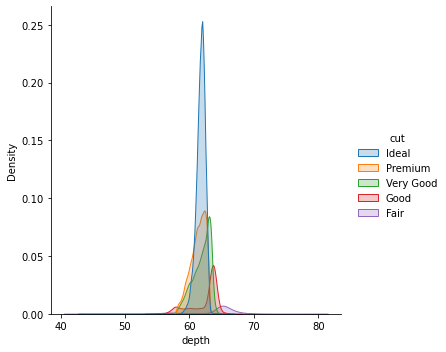

In [23]:
sns.displot(diamonds, x="depth", hue='cut',kind="kde", fill="True")

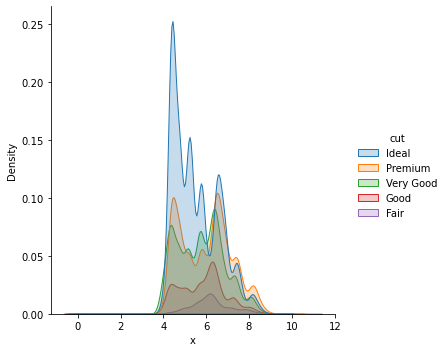

In [24]:
sns.displot(diamonds, x="x", hue='cut',kind="kde", fill="True")

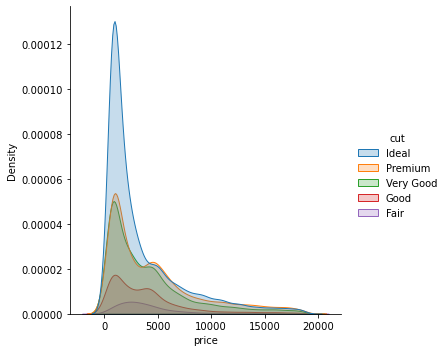

In [25]:
sns.displot(diamonds, x="price", hue='cut',kind="kde", fill="True")

<AxesSubplot:xlabel='x', ylabel='table'>

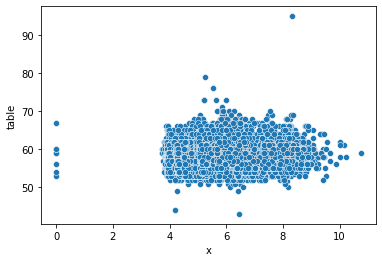

In [26]:
sns.scatterplot(diamonds, x="x",y='table')

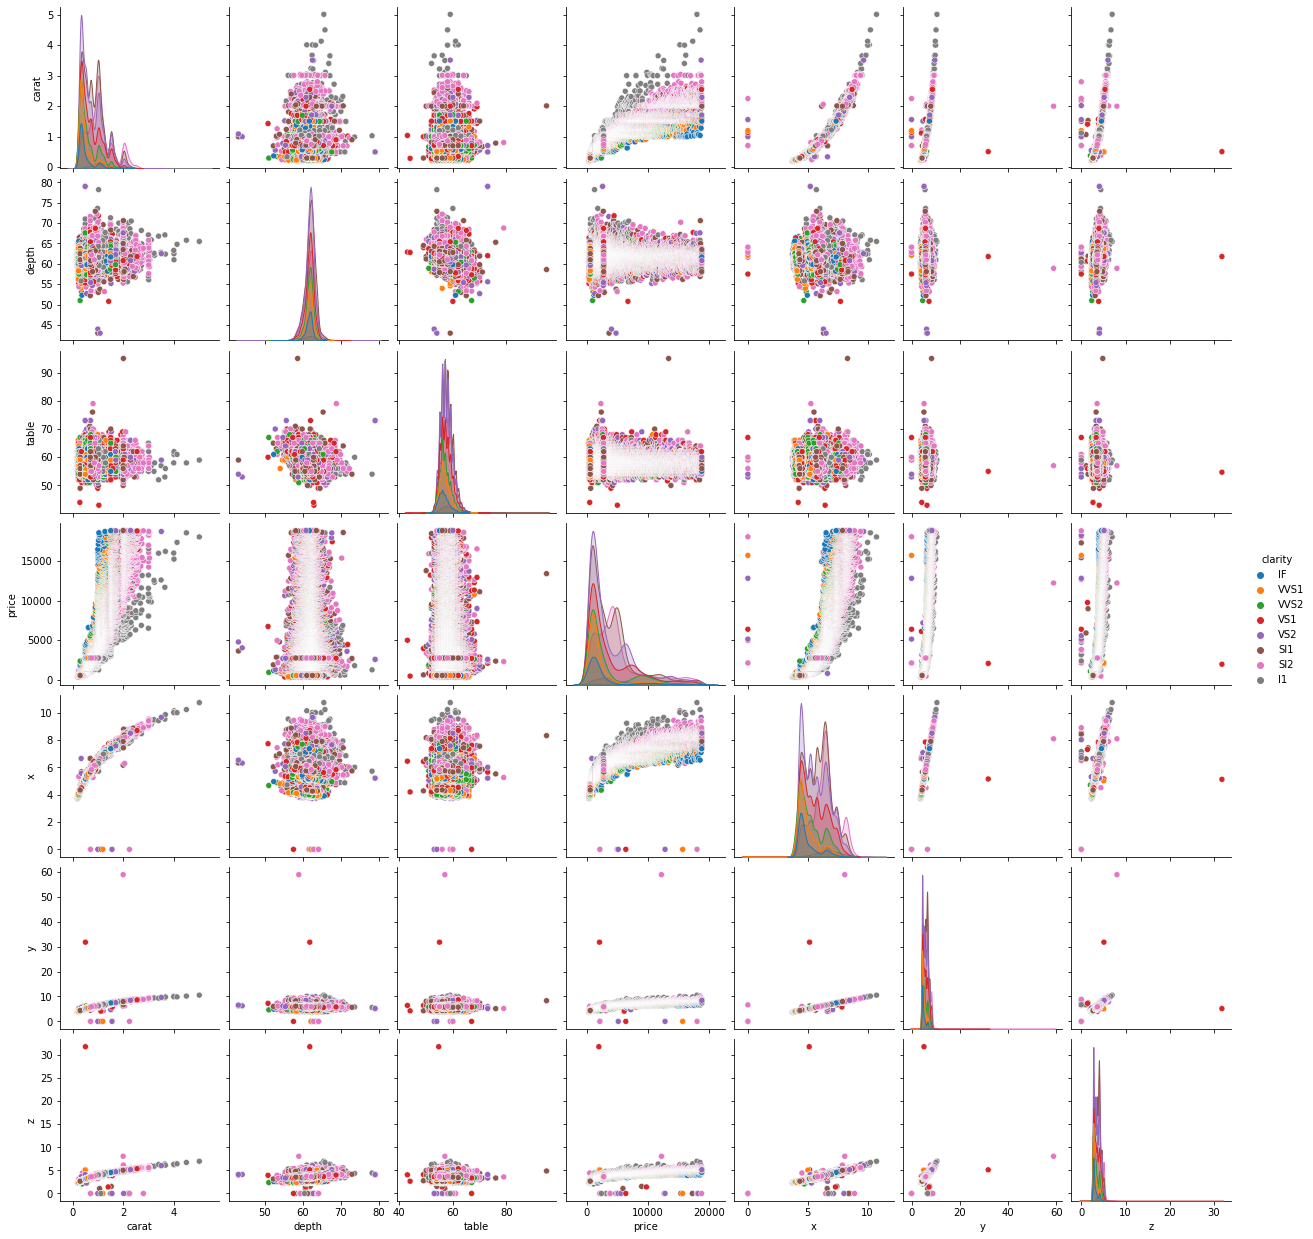

In [50]:
sns.pairplot(diamonds,hue='clarity')


<AxesSubplot:xlabel='cut', ylabel='carat'>

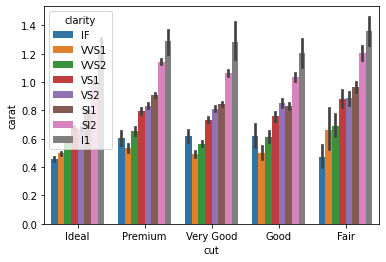

In [27]:
sns.barplot(x="cut", y="carat", hue="clarity", data=diamonds)


<AxesSubplot:xlabel='color', ylabel='price'>

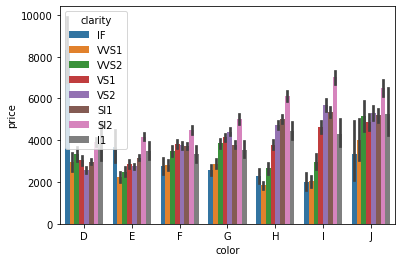

In [28]:
sns.barplot(x="color", y="price", hue="clarity", data=diamonds)


- [x] this plot say us with undrestood that my first color is one of  the colors(in this dataset my first color is 0 or same D),when we have the best clarity ,we have a maximum price

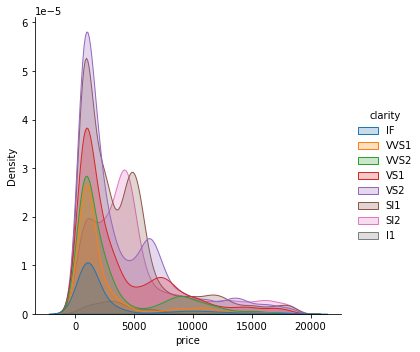

In [29]:
sns.displot(diamonds, x="price", hue='clarity',kind="kde", fill="True")

## step five: ModelTraining

now  in this step i use ML alghoritm for train my model . for example i use **LogisticRegression and KNN** alghoritm for this data set and i comapre that to find what that have the best performane According to metrics like Accuracy,F1 score and etc.

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 10)
(10788, 10)
(43152, 1)
(10788, 1)


**StandardScaler**: StandardScaler is the industry's go-to algorithm.🙂 StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

in this section i use StandardScaler

In [78]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

- [x] 1-**LinearRegression**:Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [47]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred_LR=LR.predict(x_test)
x_test

array([[-1.17935924,  0.98135504,  0.24072386, ..., -1.57349876,
        -1.51325014, -1.51013337],
       [-0.46105347, -0.81219173, -0.3479487 , ..., -0.26121355,
        -0.27576274, -0.39439917],
       [-0.841333  ,  0.98135504, -0.93662126, ..., -0.86825705,
        -0.86836234, -0.83221892],
       ...,
       [-1.03147276, -1.70896512,  0.24072386, ..., -1.1717788 ,
        -1.10365924, -1.35477797],
       [ 0.91217813,  0.98135504, -0.3479487 , ...,  0.997509  ,
         0.94429526,  1.03204582],
       [ 0.59527853, -1.70896512,  2.00674153, ...,  0.59578903,
         0.72642776,  0.79195112]])

In [55]:
y_test

,price
1388,559
50052,2201
41645,1238
42377,1304
17244,6901
...,...
44081,1554
23713,633
31375,761
21772,9836


In [57]:
y_pred_LR

array([[ 559.],
       [2201.],
       [1238.],
       ...,
       [ 761.],
       [9836.],
       [3742.]])

In [82]:
LR.intercept_

array([3939.49070727])

In [83]:
LR.coef_

array([[-1.56999443e-12,  1.59161573e-12,  5.68434189e-14,
         1.70530257e-13,  3.65929509e-13,  9.94759830e-13,
         3.98995473e+03, -9.09494702e-13,  2.27373675e-13,
         2.27373675e-13]])

## Model(MLR) Evaluation

In [92]:
print('R^2:',metrics.r2_score(y_test, y_pred_LR))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_LR))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_LR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))

R^2: 1.0
MAE: 2.0445504968526296e-12
MSE: 6.502066699947843e-24
RMSE: 2.549915037790052e-12


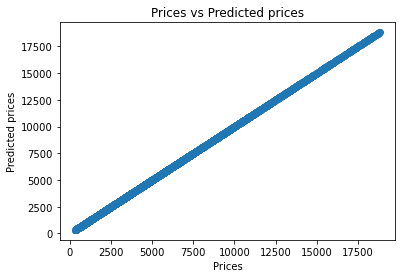

In [94]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_LR)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

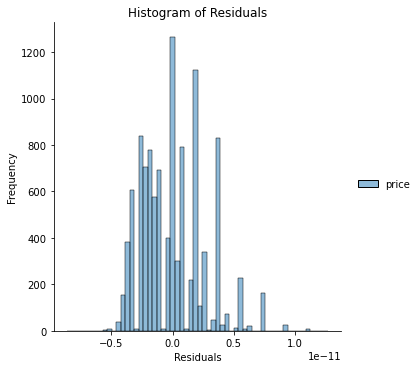

In [98]:
sns.displot(y_test-y_pred_LR)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## RESULT:


- [x] 1-Prices = Predicted prices and the a accurate of the model is 100%

thank you for reading 